In [156]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import extract_sentences
import pandas as pd
import numpy as np

In [157]:
import string
punctuations = string.punctuation

In [158]:
from spacy.lang.en import English
parser = English()

In [159]:
#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

In [160]:
# Basic utility function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [161]:
#Create spacy tokenizer that parses a sentence and generates tokens
#these can also be replaced by word vectors 
def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]     
    return tokens

#create vectorizer object to generate feature vectors, we will use custom spacy’s tokenizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
classifier = LinearSVC()

In [162]:
# Create the  pipeline to clean, tokenize, vectorize, and classify 
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

In [163]:
# Load sample data
#manually identified/tagged synthesis paragraphs
train_p = [[117, 118, 119], [112], [117], [122, 125], [88]]
p=[1,2,3,4,5]
syn_yes=[]
syn_no=[]
for i in range(len(p)):
    sen_yes_arr, sen_no_arr = extract_sentences.extract_sentences('journal_articles/Paper' + str(p[i]) + '.html', train_p[p[i]-1])
    print(sen_yes_arr)
    for j in range(len(sen_yes_arr)):
        syn_yes.append(sen_yes_arr[j])
    for k in range(len(sen_no_arr)):
        syn_no.append(sen_no_arr[k])
Syn_sen=pd.DataFrame({'x':syn_yes, 'y':np.ones(len(syn_yes))}) #tagging 
Syn_not_sen=pd.DataFrame({'x':syn_no, 'y':np.zeros(len(syn_no))})
Train=[Syn_sen,Syn_not_sen]
train_data=pd.concat(Train,ignore_index=True)
train_data

[Sentence('We placed approximately 500\u2009mg of CH3NH3I and 100\u2009mg of PbCl2 into separate crucibles.', 0, 86), Sentence('The device substrates were placed in a substrate holder above the sources with the TiO2-coated FTO side facing down towards the sources.', 87, 223), Sentence('Once the pressure in the chamber was pumped down to below 10−5\u2009mbar, the two sources were heated slightly above their desired deposition temperatures for approximately 5\u2009min (that is, CH3NH3I was heated to about 120\u2009°C and PbCl2 was heated to about 325\u2009°C) to remove volatile impurities before depositing the materials onto the substrate.', 224, 562), Sentence('The substrate holder was rotated to ensure uniform coating throughout deposition, because the right-hand source predominantly coats the right-hand side of the substrate and similarly for the left.', 563, 759), Sentence('The substrate holder was water-cooled to approximately 21\u2009°C, though precise measurement of the substrate 

[Sentence('CH3NH3I and NH2CH = NH2I were first synthesized by reacting 30\xa0ml hydroiodic acid (57% in water, Aldrich), 27.86\xa0ml CH3NH2 (40% in methanol, Junsei Chemical), and 15\xa0g formamidine acetate (Aldrich) in a 250\xa0ml round-bottomed flask at 0\xa0°C for 2\xa0h with stirring.', 0, 261), Sentence('The precipitates were recovered by evaporating the solutions at 50\xa0°C for 1\xa0h.', 262, 340), Sentence('The products were dissolved in ethanol, recrystallized using diethyl ether, and finally dried at 60\xa0°C in a vacuum oven for 24\xa0h.', 341, 470), Sentence('Similarly, CH3NH3Br and NH2CH = NH2Br were prepared using hydrobromic acid (48\xa0wt% in water, Aldrich) according to a reported procedure27.', 471, 609), Sentence('The desired solutions of FAPbI3, (FAPbI3)1\xa0−\xa0x(MAPbI3)x, (FAPbI3)1\xa0−\xa0x(FAPbBr3)x, and (FAPbI3)1\xa0−\xa0x(MAPbBr3)x (with x = 0–0.30) were prepared by dissolution of the CH3NH3I, CH3NH3Br, NH2CH = NH2I, and NH2CH = NH2Br powders with PbI2 (Aldr

,x,y
0,We placed approximately 500 mg of CH3NH3I and ...,1.0
1,The device substrates were placed in a substra...,1.0
2,Once the pressure in the chamber was pumped do...,1.0
3,The substrate holder was rotated to ensure uni...,1.0
4,The substrate holder was water-cooled to appro...,1.0
5,Perovskite films were optimized for best devic...,1.0
6,"In particular, device performance was very sen...",1.0
7,In our trials we performed the following steps.,1.0
8,(1) We varied the as-deposited composition of ...,1.0
9,(2) We varied the film thickness—at the optimu...,1.0


In [164]:
t=[0]
test_p = [[109]]
syn_test_yes=[]
syn_test_no=[]
for i in range(len(t)):
    sen_yes_arr, sen_no_arr = extract_sentences.extract_sentences('journal_articles/Paper' + str(t[i]) + '.html', test_p[t[i]])
    for j in range(len(sen_yes_arr)):
        syn_test_yes.append(sen_yes_arr[j])
    for k in range(len(sen_no_arr)):
        syn_test_no.append(sen_no_arr[k])
Syn_test_sen=pd.DataFrame({'X':syn_test_yes, 'Y':np.ones(len(syn_test_yes))})
Syn_test_not_sen=pd.DataFrame({'X':syn_test_no, 'Y':np.zeros(len(syn_test_no))})
Test=[Syn_test_sen,Syn_test_not_sen]
test_data=pd.concat(Test,ignore_index=True)

In [165]:
X_train=[str(train_data['x'][x]) for x in range(train_data.shape[0])]
Y_train=[str(train_data['y'][x]) for x in range(train_data.shape[0])]
X_test=[str(test_data['X'][x]) for x in range(test_data.shape[0])]
Y_test=[str(test_data['Y'][x]) for x in range(test_data.shape[0])]


In [166]:
# Create model and measure accuracy
a=pipe.fit([X_train[i] for i in range(len(X_train))], [Y_train[i] for i in range(len(Y_train))])
pred_data = pipe.predict([X_test[i] for i in range(len(X_test))]) 
#for (sample, pred) in zip(X_test, pred_data):
#    print (sample, pred) 
print ("Accuracy:", accuracy_score([Y_test[i] for i in range(len(Y_test))], pred_data))
a

Accuracy: 0.9894242068155111


Pipeline(memory=None,
     steps=[('cleaner', <__main__.predictors object at 0x00000206EE570BE0>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
      ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [167]:
predicted_output = pred_data.astype(np.float)
Synthesis_sentence=[]
Not_Synthesis_sentence=[]
for i in range(len(predicted_output)):
    if predicted_output[i]==1:
        Synthesis_sentence.append(X_test[i])
    else:
        Not_Synthesis_sentence.append(X_test[i])

In [168]:
Synthesis_sentence

['A 200–300-nm-thick mesoporous TiO2 (particle size: about 50 nm, crystalline phase: anatase) film was spin-coated onto the bl-TiO2/FTO substrate using home-made pastes14 and calcining at 500 °C for 1 h in air to remove organic components.',
 'CH3NH3I (MAI) and CH3NH3Br (MABr) were first synthesized by reacting 27.86 ml CH3NH2 (40% in methanol, Junsei Chemical) and 30 ml HI (57 wt% in water, Aldrich) or 44 ml HBr (48 wt% in water, Aldrich) in a 250 ml round-bottom flask at 0 °C for 4 h with stirring, respectively.',
 'The precipitate was recovered by evaporation at 55 °C for 1 h. MAI and MABr were dissolved in ethanol, recrystallized from diethyl ether, and dried at 60 °C in a vacuum oven for 24 h.',
 'The resulting solution was coated onto the mp-TiO2/bl-TiO2/FTO substrate by a consecutive two-step spin-coating process at 1,000 and 5,000 r.p.m for 10 and 20 s, respectively.',
 'During the second spin-coating step, the substrate (around 1 cm × 1 cm) was treated with toluene drop-castin

In [169]:
Not_Synthesis_sentence

['A dense blocking layer of TiO2 (bl-TiO2, ∼70 nm in thickness) was deposited onto a F-doped SnO2 (FTO, Pilkington, TEC8) substrate by spray pyrolysis, using a 20 mM titanium diisopropoxide bis(acetylacetonate) solution (Aldrich) at 450 °C to prevent direct contact between the FTO and the hole-conducting layer.',
 'The prepared MAI and MABr powders, PbI2 (Aldrich) and PbBr2 (Aldrich) for 0.8 M MAPb(I1\xa0−\xa0xBrx)3 (x\xa0 = \xa00.1–0.15) solution were stirred in a mixture of GBL and DMSO (7:3 v/v) at 60 °C for 12 h.',
 'A detailed time-rotation profile for the spin-coating is represented in Supplementary Fig.\xa01c.',
 'A solution of poly(triarylamine) (15 mg, PTAA, EM Index, Mw\xa0 = \xa017,500 g mol−1) in toluene (1.5 ml) was mixed with 15 μl of a solution of lithium bistrifluoromethanesulphonimidate (170 mg) in acetonitrile (1 ml) and 7.5 μl 4-tert-butylpyridine and spin-coated on the MAPb(I1\xa0−\xa0xBrx)3 (x\xa0 = \xa00.1–0.15)/mp-TiO2/bl-TiO2/FTO substrate at 3,000 r.p.m for 30 

In [171]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.model_selection import train_test_split
import pylab as pl
import numpy as np
iris = load_iris()

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(iris.data,   iris.target, test_size=0.10, random_state=111)
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)

array([[ 0.63475131,  1.46325398],
       [ 3.23846315, -1.63514888],
       [ 5.25827109, -0.97964627],
       ...,
       [-0.41907944, -0.045705  ],
       [-0.41881643, -0.04546163],
       [-0.41414412, -0.03633194]])

In [172]:
svmClassifier_2d =   svm.LinearSVC(random_state=111).fit(   pca_2d, y_train)
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    s=50,marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    s=50,marker='o')
    elif y_train[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=50,marker='*')
pl.legend([c1, c2, c3], ['Setosa', 'Versicolor',   'Virginica'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()

"X_train, X_test, y_train, y_test =  train_test_split(iris.data,   iris.target, test_size=0.10, random_state=111)\npca = PCA(n_components=2).fit(X_train)\npca_2d = pca.transform(X_train)\nsvmClassifier_2d =   svm.LinearSVC(random_state=111).fit(   pca_2d, y_train)\nfor i in range(0, pca_2d.shape[0]):\n    if y_train[i] == 0:\n        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    s=50,marker='+')\n    elif y_train[i] == 1:\n        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    s=50,marker='o')\n    elif y_train[i] == 2:\n        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=50,marker='*')\npl.legend([c1, c2, c3], ['Setosa', 'Versicolor',   'Virginica'])\nx_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1\ny_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))\nZ = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])\nZ = Z.reshape(xx.shape)\npl.contour(xx, yy, Z)\np

In [174]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)


In [175]:
df=pd.DataFrame(X_train_counts.todense())
df

,0,1,2,3,4,5,6,7,8,9,...,3751,3752,3753,3754,3755,3756,3757,3758,3759,3760
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
#X_train, X_test, y_train, y_test =  train_test_split(df,train_data['y'], test_size=0.10, random_state=111)


(4203, 3761)

In [176]:
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
pca_2d

array([[ 0.63475131,  1.46325398],
       [ 3.23846315, -1.63514888],
       [ 5.25827109, -0.97964627],
       ...,
       [-0.41907944, -0.045705  ],
       [-0.41881643, -0.04546163],
       [-0.41414412, -0.03633194]])

In [180]:
pca_2d.shape

(4671, 2)

In [178]:
train_data['y']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
4641    0.0
4642    0.0
4643    0.0
4644    0.0
4645    0.0
4646    0.0
4647    0.0
4648    0.0
4649    0.0
4650    0.0
4651    0.0
4652    0.0
4653    0.0
4654    0.0
4655    0.0
4656    0.0
4657    0.0
4658    0.0
4659    0.0
4660    0.0
4661    0.0
4662    0.0
4663    0.0
4664    0.0
4665    0.0
4666    0.0
4667    0.0
4668    0.0
4669    0.0
4670    0.0
Name: y, Length: 4671, dtype: float64

In [116]:
svmClassifier_2d =   LinearSVC(random_state=111).fit(pca_2d, train_data['y'])

ValueError: X has 2 features per sample; expecting 3761

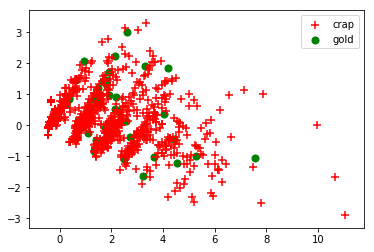

In [179]:
for i in range(0, pca_2d.shape[0]):
    if train_data['y'][i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    s=50,marker='+')
    elif train_data['y'][i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    s=50,marker='o')
    #elif y_train[i] == 2:
    #    c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=50,marker='*')
pl.legend([c1, c2], ['crap', 'gold'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()

In [89]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(4671, 3761)

In [92]:
len(Y_train)

4671